
# The pruning is done by a loop that chooses the most accurate parameter value for depth, number of leaf nodes and Cost Complexity Pruning (ccp_alpha) . Those are the three parameters used in pruning trees in sklearn library. Read the comments for further explaination. 


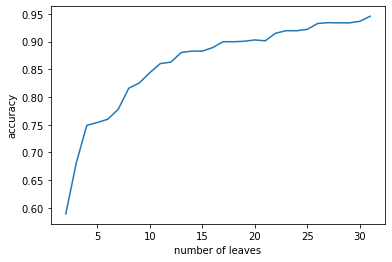

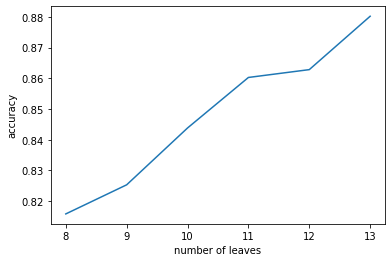

Highest accuracy 88.0% at number of leaves 13


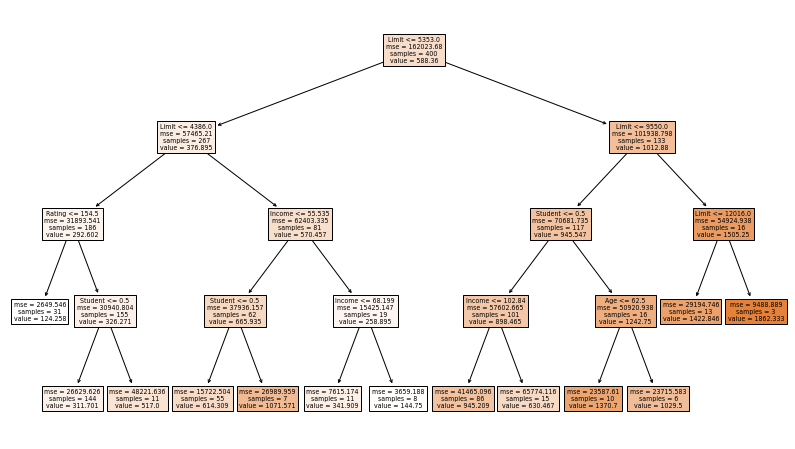

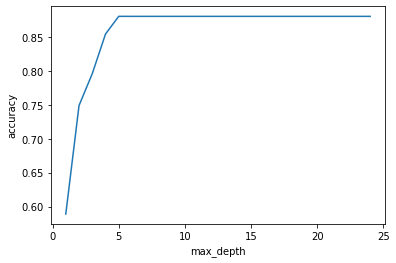

Highest accuracy 88.0% at depth 5


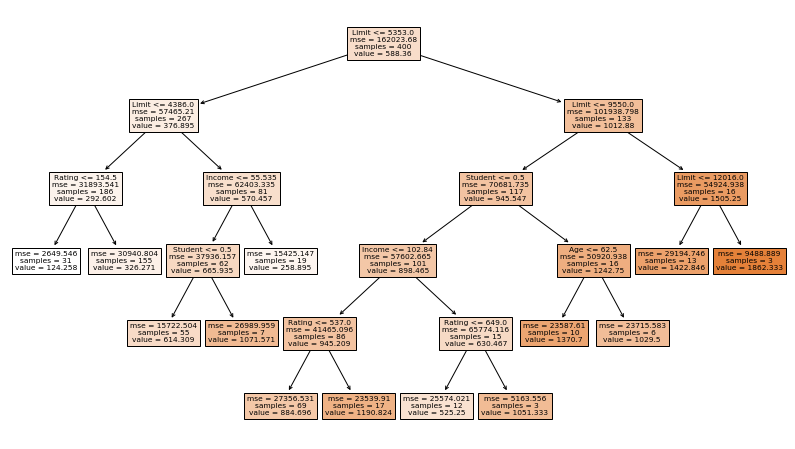

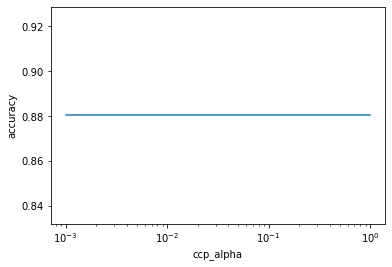

Highest accuracy 88.0% at ccp_alpha 0.001


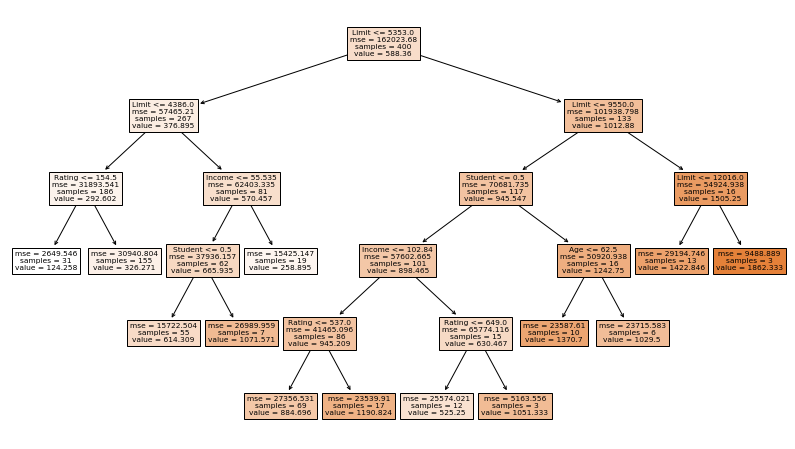

Accuracy score before pruning is 85.532046%
Final accuracy score after pruning is 88.025921%
With an accuracy difference (before pruning - after pruning) of -2.493876%
I would say the pruning has been very succesful
since we have cut the number of leaves by more than half while increasing the accuracy scpre.


In [43]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import numpy as np


#plotting the most accurate number of leaves to specify a smaller range of number of leaves. 
#without having a major effect on the accuracy of the tree, since the original tree had 30 leaves
#we will set a range of (2 - 32) leaves
num_leaf_test = range(2, 32)
acc_leaf_test = []
for i in num_leaf_test:
    dt = DecisionTreeRegressor(random_state = 10, max_leaf_nodes = i)
    dt.fit(X, Y)
    acc_leaf_test.append(dt.score(X_test, Y_test))

plt.plot(num_leaf_test, acc_leaf_test)
plt.xlabel('number of leaves')
plt.ylabel('accuracy')
plt.show()

#Since the accuracy suddenly increases at nummber of leaves 8-14
#We find the most accurate max leaf nodes in range (8, 14)
num_leaf = range(8, 14)
acc_leaf = []
for i in num_leaf:
    dt = DecisionTreeRegressor(random_state = 10, max_leaf_nodes = i)
    dt.fit(X, Y)
    acc_leaf.append(dt.score(X_test, Y_test))

plt.plot(num_leaf, acc_leaf)
plt.xlabel('number of leaves')
plt.ylabel('accuracy')
plt.show()

#Find the largest accuracy and the number of leaves it occurs
max_leaf_acc = np.max(acc_leaf)
best_num_leaf = num_leaf[np.argmax(acc_leaf)]
print(f'Highest accuracy {round(max_leaf_acc, 3)*100}% at number of leaves {best_num_leaf}')


#Refit decision tree model with the highest accuracy for num of leaves and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeRegressor(random_state = 1, max_leaf_nodes = best_num_leaf, max_depth = 4)
dt.fit(X, Y)
tree.plot_tree(dt, feature_names = X_colum, filled=True)
plt.show()


#Fit a decision tree for max_depth values 1-25; save the accuracy score in acc_depth
depths = range(1, 25)
acc_depth = []
for i in depths:
    dt = DecisionTreeRegressor(random_state = 10, max_leaf_nodes = best_num_leaf ,max_depth = i)
    dt.fit(X, Y)
    acc_depth.append(dt.score(X_test, Y_test))

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()
    
#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

#Refit decision tree model with the highest accuracy of depth and plot the decision tree
plt.figure(figsize=(14,8))
dt = DecisionTreeRegressor(random_state = 1, max_leaf_nodes = best_num_leaf, max_depth = best_depth)
dt.fit(X, Y)
tree.plot_tree(dt, feature_names = X_colum, filled=True)
plt.show()

#Create a new list for the accuracy values of a pruned decision tree. 
#Loop through the values of ccp and append the scores to the list
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt_prune = DecisionTreeRegressor(random_state = 1, max_leaf_nodes = best_num_leaf, max_depth = best_depth, ccp_alpha=i)
    dt_prune.fit(X, Y)
    acc_pruned.append(dt_prune.score(X_test, Y_test))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

#Fit a decision tree model with the values for max_leaf_nodes, max_depth and ccp_alpha found above
dt_final = DecisionTreeRegressor(random_state = 1, max_depth = best_depth, max_leaf_nodes = best_num_leaf, ccp_alpha=best_ccp)
dt_final.fit(X, Y)

#Plot the final decision tree
plt.figure(figsize=(14,8))
tree.plot_tree(dt, feature_names = X_colum, filled=True)
plt.show()

final_score = dt_final.score(X_test, Y_test)

acc_diff = regressor.score(X_test, Y_test) - dt_final.score(X_test, Y_test)


print(f'Accuracy score before pruning is {round(regressor.score(X_test, Y_test), 8)*100}%')
print(f'Final accuracy score after pruning is {round(final_score, 8)*100}%')

print(f'With an accuracy difference (before pruning - after pruning) of {round(acc_diff, 8)*100}%')
print("I would say the pruning has been very succesful") 
print("since we have cut the number of leaves by more than half while increasing the accuracy scpre.")


# Random forest


<ipython-input-39-330069316275>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, Y)


Accuracy score after applying random forest is 90.0%


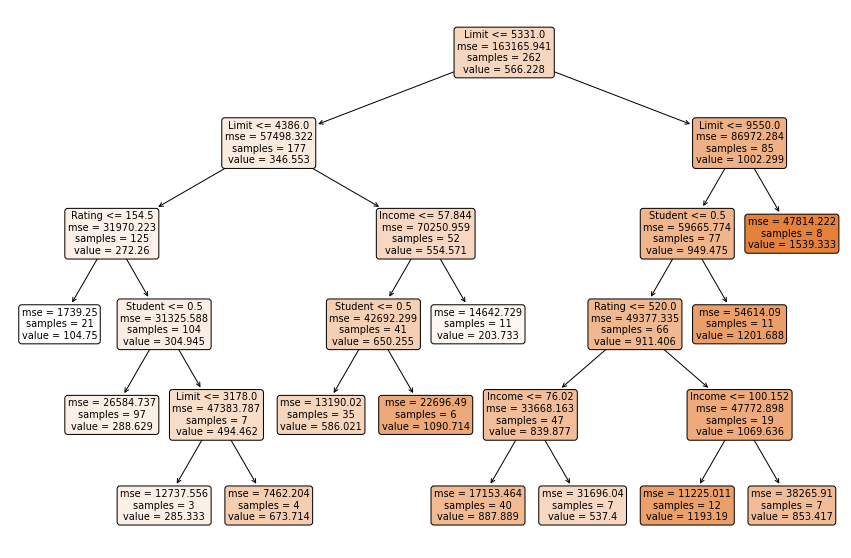

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

rf = RandomForestRegressor(random_state = 1, max_leaf_nodes = best_num_leaf, max_depth = best_depth, ccp_alpha=best_ccp)
rf.fit(X, Y)
rf.score(X_test, Y_test)

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], 
          feature_names= X_colum, 
          filled=True, impurity=True, 
          rounded=True)
print(f'Accuracy score after applying random forest is {round(rf.score(X_test, Y_test), 3)*100}%')